In [1]:
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

## This sets the plot style
## to have a grid on a white background
sns.set_style("whitegrid")

In [2]:
root_df=pd.read_csv("Root_Insurance_data.csv")

In [3]:
Pir=np.zeros((36,5))
Mi=[]
Entry_Ins=[]
Entry_Veh=[]
Entry_Dri=[]
Entry_Mar=[]

In [4]:

Insure=["Y","N","unknown"]
Ncars=[1,2,3]
Ndrivers=[1,2]
Marital=["S","M"]
Count=0
total=len(root_df.index)
for i in Insure:
    for j in Ncars:
        for n in Ndrivers:
            for m in Marital:
                tmp=len(root_df.loc[(root_df["Currently Insured"]==i) & (root_df["Number of Vehicles"]==j) & (root_df["Number of Drivers"]==n) & (root_df["Marital Status"]==m)].index)
                #Mi[Count]=tmp/total
                Mi.append(tmp/total)
                Entry_Ins.append(i)
                Entry_Veh.append(j)
                Entry_Dri.append(n)
                Entry_Mar.append(m)
                for r in range(1,6):
                    Nrank=len(root_df.loc[(root_df["Currently Insured"]==i) & (root_df["Number of Vehicles"]==j) & (root_df["Number of Drivers"]==n) & (root_df["Marital Status"]==m) & (root_df["rank"]==r)].index)
                    if(tmp!=0):
                        P=Nrank/tmp
                    Pir[Count,r-1]=P
                    #Pir.append(P)
                Count=Count+1   
#print(Pir)

In [5]:
from scipy.optimize import curve_fit
from scipy.special import factorial
from scipy.stats import binom

In [6]:
def fit_function_binom(k, p):
    return binom.pmf(k,4,p)

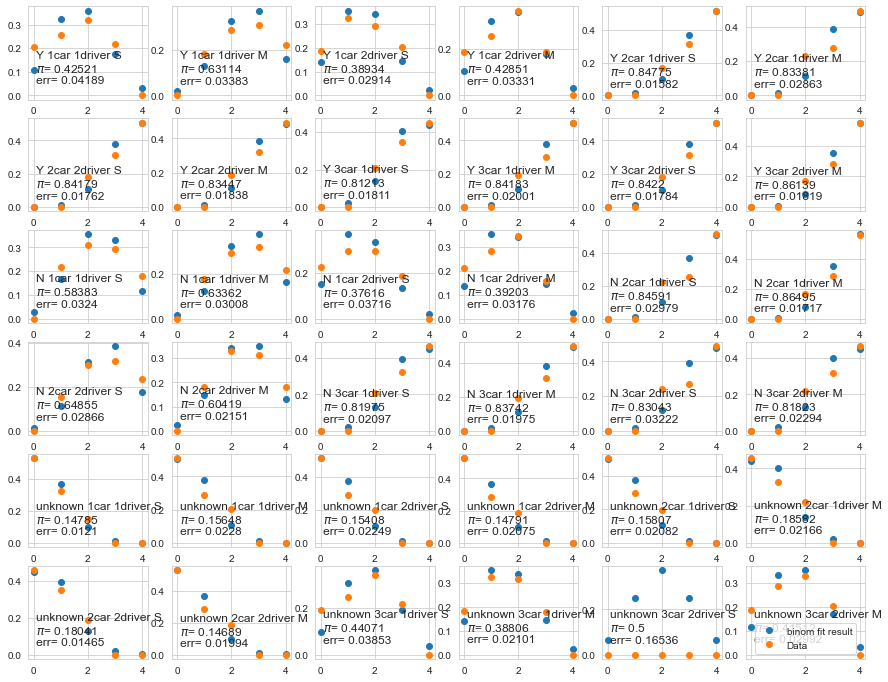

In [31]:
fig_binom, axes_binom = plt.subplots(6, 6, figsize = (15,12))
bi0_binom=[]
P_binom=[]
for i in range(0,36):
    parameters_binom, cov_matrix_binom = curve_fit(fit_function_binom, [0,1,2,3,4], Pir[i],p0=0.5)
    x_plot_binom = np.arange(0, 5)
    
    row=int(i/6)
    col=int(i%6)
    
    axes_binom[row,col].plot(
        x_plot_binom,
        fit_function_binom(x_plot_binom, *parameters_binom),
        marker='o', linestyle='',
        label='binom fit result',
    )
    #print(cov_matrix_binom)
    perr = np.round(np.sqrt(np.diag(cov_matrix_binom)),5)
    pi= np.round(parameters_binom,5)
    ins=int(i/12)
    j=int((i-12*ins)/4)
    n=int((i-12*ins-4*j)/2)
    m=i-12*ins-4*j-2*n
    s=Insure[ins]+' '+str(Ncars[j])+'car '+str(Ndrivers[n])+'driver '+Marital[m]+"\n"+"$\pi$= "+str(pi[0])+"\n"+"err= "+str(perr[0])
    axes_binom[row,col].text(0.1, 0.05, s, fontsize=12)

    P_binom.append(parameters_binom[0])
    bi0_binom.append(np.log(parameters_binom[0]/(1-parameters_binom[0])))
   
    axes_binom[row,col].plot(
        x_plot_binom,
        Pir[i],
        marker='o', linestyle='',
        label='Data',
    )

plt.legend()
plt.savefig("Binomial_fit_plots")
plt.show()